In [1]:
import kaggle

OSError: ignored

In [0]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle

In [3]:
! ls -lA /root/.kaggle

total 4
-rw-r--r-- 1 root root 69 Mar 14 15:08 kaggle.json


In [4]:
import kaggle

In [5]:
!kaggle competitions download -c dogs-vs-cats

 97% 528M/543M [00:05<00:00, 108MB/s]
100% 543M/543M [00:05<00:00, 102MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 82.6MB/s]
 98% 265M/271M [00:02<00:00, 126MB/s]
100% 271M/271M [00:02<00:00, 110MB/s]


In [6]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
!unzip -q train.zip

In [0]:
#!ls train

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

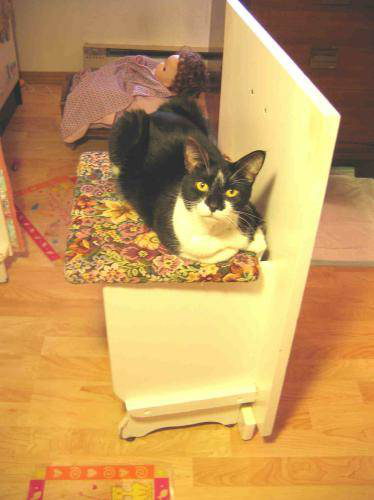

In [13]:
Image.open("./train/cat.7750.jpg")

In [14]:
cv2.imread("./train/cat.7750.jpg").shape

(500, 374, 3)

In [15]:
cv2.imread("./train/dog.12245.jpg").shape


(499, 377, 3)

In [0]:
img1=cv2.imread("./train/dog.12245.jpg")

In [17]:
img1.shape

(499, 377, 3)

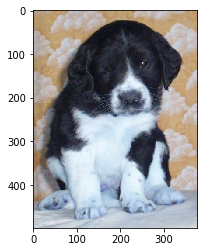

In [18]:
plt.imshow(img1)

In [0]:
#resizing the image to achieve  the same size for all the images
img2=cv2.resize(img1,(300,300))

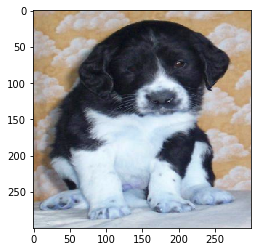

In [20]:
plt.imshow(img2)

In [0]:
import os
from tqdm import tqdm_notebook

In [22]:
os.listdir("./train")

['cat.2189.jpg',
 'cat.4579.jpg',
 'cat.5154.jpg',
 'dog.828.jpg',
 'dog.6892.jpg',
 'dog.10329.jpg',
 'cat.10716.jpg',
 'dog.12090.jpg',
 'dog.4567.jpg',
 'cat.3900.jpg',
 'cat.10107.jpg',
 'cat.10381.jpg',
 'cat.5465.jpg',
 'dog.5261.jpg',
 'cat.5556.jpg',
 'cat.9548.jpg',
 'cat.6869.jpg',
 'dog.4884.jpg',
 'dog.168.jpg',
 'dog.4720.jpg',
 'dog.8133.jpg',
 'dog.7457.jpg',
 'dog.11242.jpg',
 'dog.5112.jpg',
 'dog.11502.jpg',
 'dog.11351.jpg',
 'cat.11320.jpg',
 'cat.12285.jpg',
 'cat.6124.jpg',
 'dog.2979.jpg',
 'cat.1147.jpg',
 'cat.6141.jpg',
 'dog.8526.jpg',
 'cat.5566.jpg',
 'dog.5588.jpg',
 'dog.8779.jpg',
 'cat.4975.jpg',
 'dog.2040.jpg',
 'dog.12463.jpg',
 'cat.2310.jpg',
 'cat.6129.jpg',
 'dog.7872.jpg',
 'dog.3756.jpg',
 'cat.12075.jpg',
 'dog.8423.jpg',
 'cat.10703.jpg',
 'dog.609.jpg',
 'cat.1472.jpg',
 'dog.10442.jpg',
 'cat.7152.jpg',
 'cat.6693.jpg',
 'dog.7521.jpg',
 'cat.5392.jpg',
 'cat.3064.jpg',
 'cat.4219.jpg',
 'cat.7427.jpg',
 'dog.6799.jpg',
 'cat.9495.jpg',
 'c

In [23]:
#sizing all the files using for loop and preparing input and output
#simple models are in to sequntials
#complex models into functional
image_list=[]
label_list=[]
for file in tqdm_notebook(os.listdir("./train")[:10000]):
  #print(file)
  if file.startswith("dog"):
    label_list.append("dog")
  else:
    label_list.append("cat")

  img=cv2.imread("./train/"+file)
  img=cv2.resize(img,(300,300))
  image_list.append(img)

In [24]:
len(image_list),len(label_list)

(10000, 10000)

In [0]:
X=np.array(image_list)

In [26]:
X.shape

(10000, 300, 300, 3)

In [0]:
#suffle data to devide it into train and test
from sklearn.model_selection import train_test_split




In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,label_list,test_size=0.2,shuffle=True)

In [29]:
x_train.shape,x_test.shape

((8000, 300, 300, 3), (2000, 300, 300, 3))

In [30]:
len(y_train), len(y_test)

(8000, 2000)

In [0]:
del X
del image_list
del label_list 

In [33]:
y_train[:5]

['dog', 'dog', 'cat', 'cat', 'dog']

In [0]:
y_train_1 = pd.get_dummies(y_train) #another way of doing OneHotEncoding
y_test_1 = pd.get_dummies(y_test) #another way of doing OneHotEncoding

In [35]:
type(y_train_1), type(y_train_1.values)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [0]:
y_train = y_train_1.values
y_test = y_test_1.values

In [65]:
y_train[:5]

array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [0]:
x_train = x_train /255
x_test = x_test /255

In [38]:
y_train.sum(axis=0)

array([3998, 4002], dtype=uint64)

In [39]:
y_test.sum(axis=0)

array([1010,  990], dtype=uint64)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Accuracy

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (300, 300, 3)))  #28 * 28 
model.add(Dense(256, activation=relu))
# model.add(Dense(256, activation=relu))
model.add(Dense(2, activation=softmax))

In [50]:
(270000 * 256) + 256 # W + B 

69120256

In [49]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 270000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               69120256  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 69,120,770
Trainable params: 69,120,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Other possible aCcuracy /metrics, IOU(Intersection over Union), MAP (Mean Average Precision)
model.compile(SGD(), categorical_crossentropy, ["acc"])

In [52]:
model_history = model.fit(x_train, y_train, 32, epochs=10, validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/10
7200/7200 [==============================] - 8s 1ms/sample - loss: 1.2129 - acc: 0.5329 - val_loss: 0.6832 - val_acc: 0.5250
Epoch 2/10
7200/7200 [==============================] - 6s 867us/sample - loss: 0.6792 - acc: 0.5675 - val_loss: 0.6648 - val_acc: 0.5987
Epoch 3/10
7200/7200 [==============================] - 6s 868us/sample - loss: 0.6748 - acc: 0.5881 - val_loss: 0.6671 - val_acc: 0.5863
Epoch 4/10
7200/7200 [==============================] - 6s 862us/sample - loss: 0.6646 - acc: 0.6025 - val_loss: 0.6587 - val_acc: 0.6237
Epoch 5/10
7200/7200 [==============================] - 6s 871us/sample - loss: 0.6580 - acc: 0.6090 - val_loss: 0.6525 - val_acc: 0.6250
Epoch 6/10
7200/7200 [==============================] - 6s 888us/sample - loss: 0.6541 - acc: 0.6122 - val_loss: 0.6628 - val_acc: 0.6250
Epoch 7/10
7200/7200 [==============================] - 6s 865us/sample - loss: 0.6542 - acc: 0.6121 - val_loss: 0.6519 - val_a

In [0]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

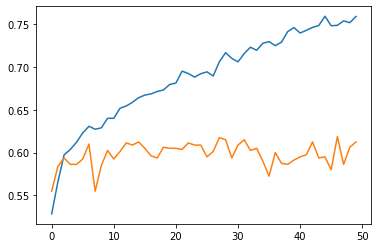

In [0]:
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])

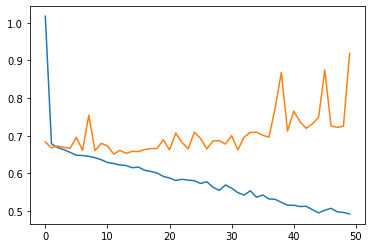

In [0]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

In [0]:
# Underfitting Vs Overfitting 

## Prediction

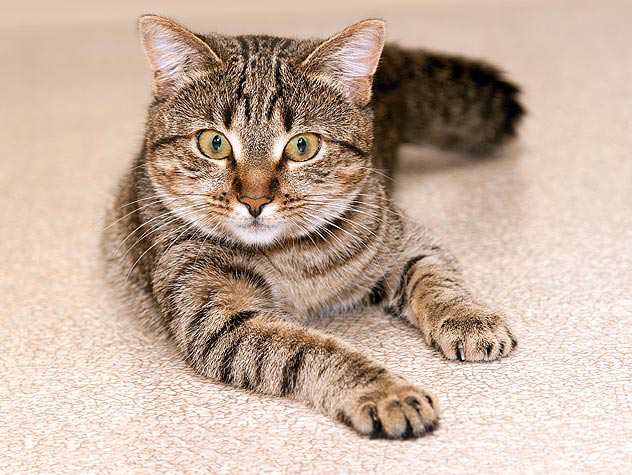

In [53]:
Image.open("cat-14March.jpg")

In [0]:
testImage = cv2.imread("cat-14March.jpg")

In [55]:
testImage.shape

(475, 632, 3)

In [57]:
model.input_shape

(None, 300, 300, 3)

In [0]:
testResizedImg = cv2.resize(testImage,(300,300))

In [59]:
testResizedImg.shape

(300, 300, 3)

In [60]:
np.expand_dims(testResizedImg,0).shape

(1, 300, 300, 3)

In [0]:
# np.expand_dims(testResizedImg,0)

In [62]:
testResizedImg = np.expand_dims(testResizedImg,0)
testResizedImg.shape

(1, 300, 300, 3)

In [0]:
testResizedImg = testResizedImg/255

In [64]:
model.predict(testResizedImg)

array([[0.35902795, 0.6409721 ]], dtype=float32)

In [0]:
def pre_prcoess_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.resize(image, (300, 300))
  image = image/255
  image = np.expand_dims(image, 0)
  return image

In [0]:
def model_prediction(image_path):
  image = pre_prcoess_image(image_path)
  result = model.predict(image)
  print(result)
  if np.argmax(result) == 1:
    return "Dog"
  else:
    return "Cat"


In [80]:
model_prediction("dog-14March.jpg")

'DOG'

In [82]:
model_prediction("fish-14March.jpeg")

[[0.36288184 0.6371181 ]]


'DOG'

In [83]:
model_prediction("cat-14March-1.jpeg")

[[0.35347927 0.64652073]]


'DOG'

#Evaluation 


In [84]:
x_test.shape

(2000, 300, 300, 3)

In [85]:
y_test.shape

(2000, 2)

In [86]:
model.evaluate(x_test,y_test)

2000/2000 [==============================] - 2s 796us/sample - loss: 0.6511 - acc: 0.5985


[0.6510823950767517, 0.5985]

In [0]:
y_pred = model.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [96]:
np.argmax(y_test,axis=1)

(2000,)

In [97]:
confusion_matrix(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1))

array([[425, 585],
       [218, 772]])

In [103]:
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      1010
           1       0.57      0.78      0.66       990

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.59      2000
weighted avg       0.62      0.60      0.59      2000



In [0]:
# Confusion Matrix - https://en.wikipedia.org/wiki/Confusion_matrix